# Cancer Diease Prediction
##### Authors : Aarushi Pandey, Karthikeyan Mohan, Robin Chabra, Yugandhar Kumar Savalam

### Importing Packages

In [1]:
import pandas as pd
import pandas_profiling as profile
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import plotly.express as px
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from kneed import DataGenerator, KneeLocator

### Loading the Dataset

In [2]:
cancer_dataset = pd.read_csv(r'data\cancer.csv')
cancer_dataset_bkp = cancer_dataset.copy() #Taking back up

### Exploratory Data Analysis

In [3]:
cancer_dataset.head()

,id,Clump Thickness,UofCSize,UofCShape,Marginal Adhesion,SECSize,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
cancer_dataset.shape

(683, 11)

In [5]:
cancer_dataset.columns

Index(['id', 'Clump Thickness', 'UofCSize', 'UofCShape', 'Marginal Adhesion',
       'SECSize', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli',
       'Mitoses', 'Class'],
      dtype='object')

In [6]:
# Check the target variable count
print(cancer_dataset.iloc[:,-1].value_counts())

2    444
4    239
Name: Class, dtype: int64


Pandas Profiling has been used to perform EDA. Because of Size constraint, we have hosted the results from this command as static website here : https://karthik1693.github.io/

In [7]:
#profile.ProfileReport(cancer_dataset)
profile = cancer_dataset.profile_report(title="Cancer dataset - EDA")
profile.to_file(output_file="Cancer_dataset_EDA.html")

### Data Preprocessing

In [8]:
#Removing the unique sequence id
cancer_dataset = cancer_dataset.drop(['id'],axis = 1)

In [9]:
cancer_dataset.head()

,Clump Thickness,UofCSize,UofCShape,Marginal Adhesion,SECSize,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [10]:
# Check any missing value is present
cancer_dataset.isnull().sum()

Clump Thickness      0
UofCSize             0
UofCShape            0
Marginal Adhesion    0
SECSize              0
Bare Nuclei          0
Bland Chromatin      0
Normal Nucleoli      0
Mitoses              0
Class                0
dtype: int64

In [28]:
cancer_dataset.corr()

,Clump Thickness,UofCSize,UofCShape,Marginal Adhesion,SECSize,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class,Cluster
Clump Thickness,1.000000,0.642481,0.653470,0.487829,0.523596,0.593091,0.553742,0.534066,0.350957,0.714790,-0.693204
UofCSize,0.642481,1.000000,0.907228,0.706977,0.753544,0.691709,0.755559,0.719346,0.460755,0.820801,-0.809513
UofCShape,0.653470,0.907228,1.000000,0.685948,0.722462,0.713878,0.735344,0.717963,0.441258,0.821891,-0.810857
Marginal Adhesion,0.487829,0.706977,0.685948,1.000000,0.594548,0.670648,0.668567,0.603121,0.418898,0.706294,-0.693732
SECSize,0.523596,0.753544,0.722462,0.594548,1.000000,0.585716,0.618128,0.628926,0.480583,0.690958,-0.683880
Bare Nuclei,0.593091,0.691709,0.713878,0.670648,0.585716,1.000000,0.680615,0.584280,0.339210,0.822696,-0.789623
Bland Chromatin,0.553742,0.755559,0.735344,0.668567,0.618128,0.680615,1.000000,0.665602,0.346011,0.758228,-0.734811
Normal Nucleoli,0.534066,0.719346,0.717963,0.603121,0.628926,0.584280,0.665602,1.000000,0.433757,0.718677,-0.706355
Mitoses,0.350957,0.460755,0.441258,0.418898,0.480583,0.339210,0.346011,0.433757,1.000000,0.423448,-0.394141
Class,0.714790,0.820801,0.821891,0.706294,0.690958,0.822696,0.758228,0.718677,0.423448,1.000000,-0.897623


### One Hot Encoding

In [11]:
cancer_dataset_preprocess = cancer_dataset.iloc[:, :-1].values

In [12]:
cancer_dataset.head(1)

,Clump Thickness,UofCSize,UofCShape,Marginal Adhesion,SECSize,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2


In [13]:
cancer_dataset_preprocess[0]

array([5, 1, 1, 1, 2, 1, 3, 1, 1], dtype=int64)

In [14]:
one_hot_encoder = OneHotEncoder(sparse=False)
one_hot_encoder.fit(cancer_dataset_preprocess)
cancer_dataset_preprocess = one_hot_encoder.transform(cancer_dataset_preprocess)

In [15]:
cancer_dataset_preprocess.shape

(683, 89)

In [16]:
cancer_dataset_preprocess

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
actual_value = list(cancer_dataset['Class']) #Storing the target value in a variable

# K-MEans Clustering

### Elbow Method - To find the K Value

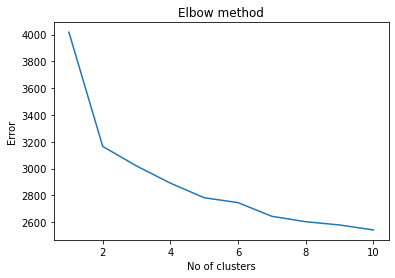

In [18]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(cancer_dataset_preprocess)
    kmeans.fit(cancer_dataset_preprocess)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [19]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 11), Error, curve="convex", direction="decreasing")
print("The optimised K-Value is:",kl.elbow)

The optimised K-Value is: 2


### Silhouette method

In [20]:
from sklearn.metrics import silhouette_score

def Silhouette(df, kmax):
    sil= [None, None]
    
    for k in range(2, kmax+1):
        kmeans= KMeans(n_clusters=k).fit(cancer_dataset_preprocess)
        labels= kmeans.labels_
        sil.append(silhouette_score(cancer_dataset_preprocess,labels,metric= 'euclidean'))
    return sil    

Text(0.5, 1.0, 'Silhouette score by number of clusters')

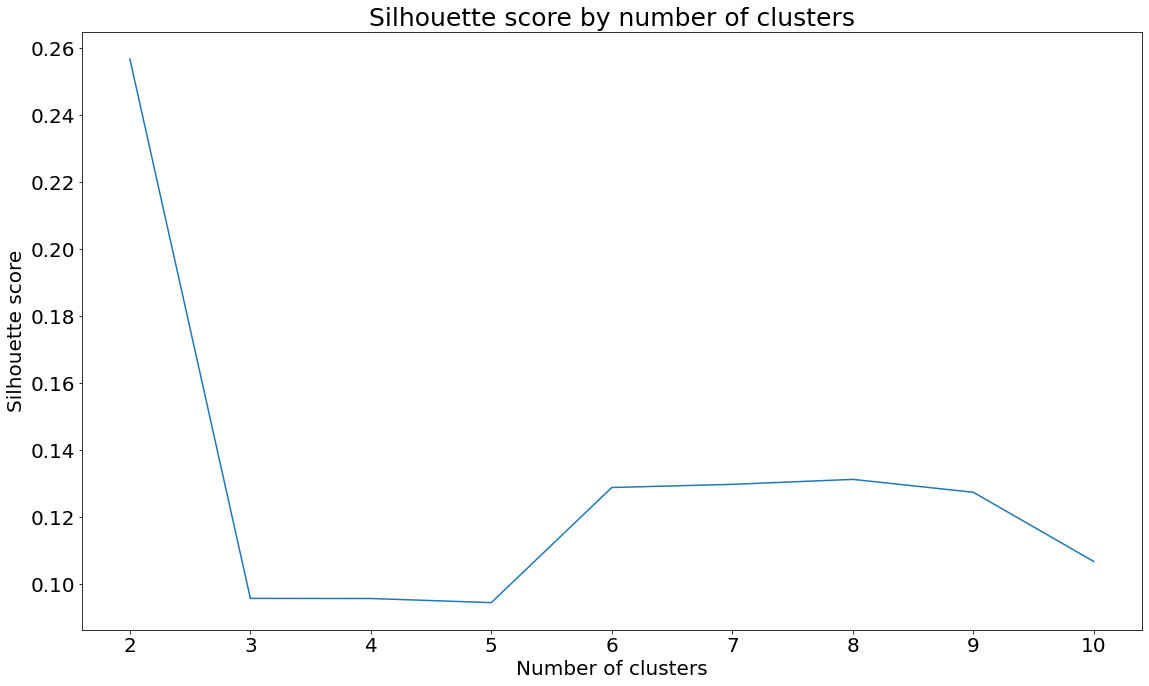

In [21]:
fig= plt.figure(figsize=(19,11))
ax= fig.add_subplot(1,1,1)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.plot(Silhouette(cancer_dataset_preprocess,10))
ax.set_xlabel('Number of clusters',fontsize=20)
ax.set_ylabel('Silhouette score',fontsize=20)
ax.set_title('Silhouette score by number of clusters',fontsize=25)

### Fit the data into K-Means Alogirthm

In [22]:
kmeans = KMeans(n_clusters = 2)
y_kmeans = kmeans.fit_predict(cancer_dataset_preprocess)

In [23]:
cancer_dataset['Cluster'] = y_kmeans

In [24]:
cancer_dataset.head()

,Clump Thickness,UofCSize,UofCShape,Marginal Adhesion,SECSize,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class,Cluster
0,5,1,1,1,2,1,3,1,1,2,1
1,5,4,4,5,7,10,3,2,1,2,0
2,3,1,1,1,2,2,3,1,1,2,1
3,6,8,8,1,3,4,3,7,1,2,0
4,4,1,1,3,2,1,3,1,1,2,1


### Compare the Actual cluster and the predicted Cluster

In [25]:
cancer_dataset.groupby(['Class','Cluster']).size()

Class  Cluster
2      0           32
       1          412
4      0          237
       1            2
dtype: int64

### Visualise the clusters with both actual and predicted value

In [26]:
#Creating a 2D visualization to visualize the clusters
from sklearn.manifold import TSNE
tsne = TSNE(verbose=1, perplexity=40, n_iter= 4000)
Y = tsne.fit_transform(cancer_dataset_preprocess)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 683 samples in 0.014s...
[t-SNE] Computed neighbors for 683 samples in 0.065s...
[t-SNE] Computed conditional probabilities for sample 683 / 683
[t-SNE] Mean sigma: 0.877173
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.792965
[t-SNE] KL divergence after 1900 iterations: 0.858321


Text(0.5, 1.0, 'k-means clustering plot')

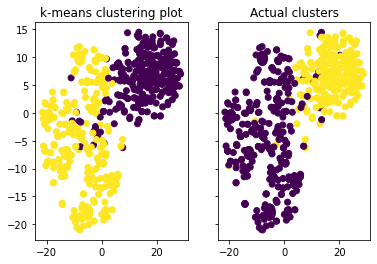

In [27]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax2.scatter(Y[:,0],Y[:,1],  c =actual_value)
ax2.set_title('Actual clusters')

ax1.scatter(Y[:,0],Y[:,1],  c=y_kmeans)
ax1.set_title('k-means clustering plot')